dataset: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality


A_id: Unique identifier for each fruit

Size: Size of the fruit

Weight: Weight of the fruit

Sweetness: Degree of sweetness of the fruit

Crunchiness: Texture indicating the crunchiness of the fruit

Juiciness: Level of juiciness of the fruit

Ripeness: Stage of ripeness of the fruit

Acidity: Acidity level of the fruit

Quality: Overall quality of the fruit

# import biblioteka

In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

# predstavljanje podataka

In [50]:

data = pd.read_csv('./data/apple_quality.csv', sep=',')
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [51]:
data = data.drop(columns='A_id')

In [52]:
data.shape

(4001, 8)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [54]:
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [55]:
data.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [56]:
data = data.dropna()

In [57]:
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [58]:

print(f"Pre uklanjanja duplikata: {data.count()}")
data.drop_duplicates(subset=None,inplace=True)
print(f"Nakon uklanjanja duplikata: {data.count()}")

Pre uklanjanja duplikata: Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality        4000
dtype: int64
Nakon uklanjanja duplikata: Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality        4000
dtype: int64


In [59]:
data['Quality'] = data['Quality'].map({'good':1,'bad':0})

In [60]:
num_rows = (len(data.columns) - 1) // 2 + 1
num_columns = min(4, len(data.columns))

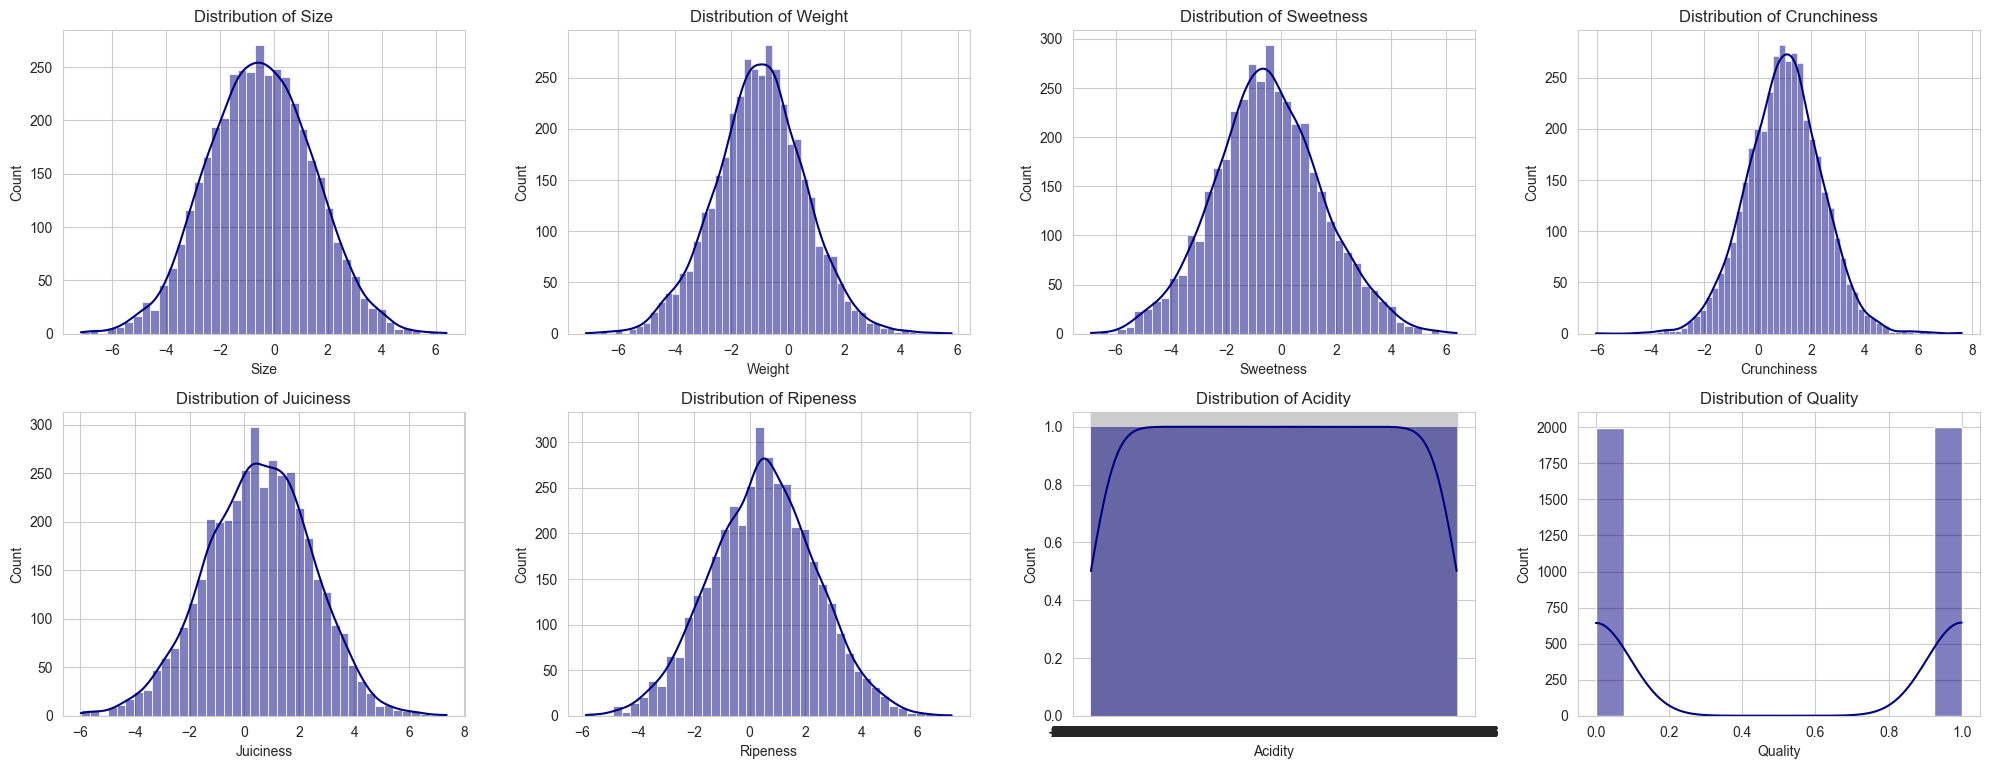

In [61]:

plt.figure(figsize=(20, 15))

for i, attribute in enumerate(data.columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(data[attribute], kde=True,  color='navy')
    plt.title(f'Distribution of {attribute}')

plt.tight_layout()
plt.show()


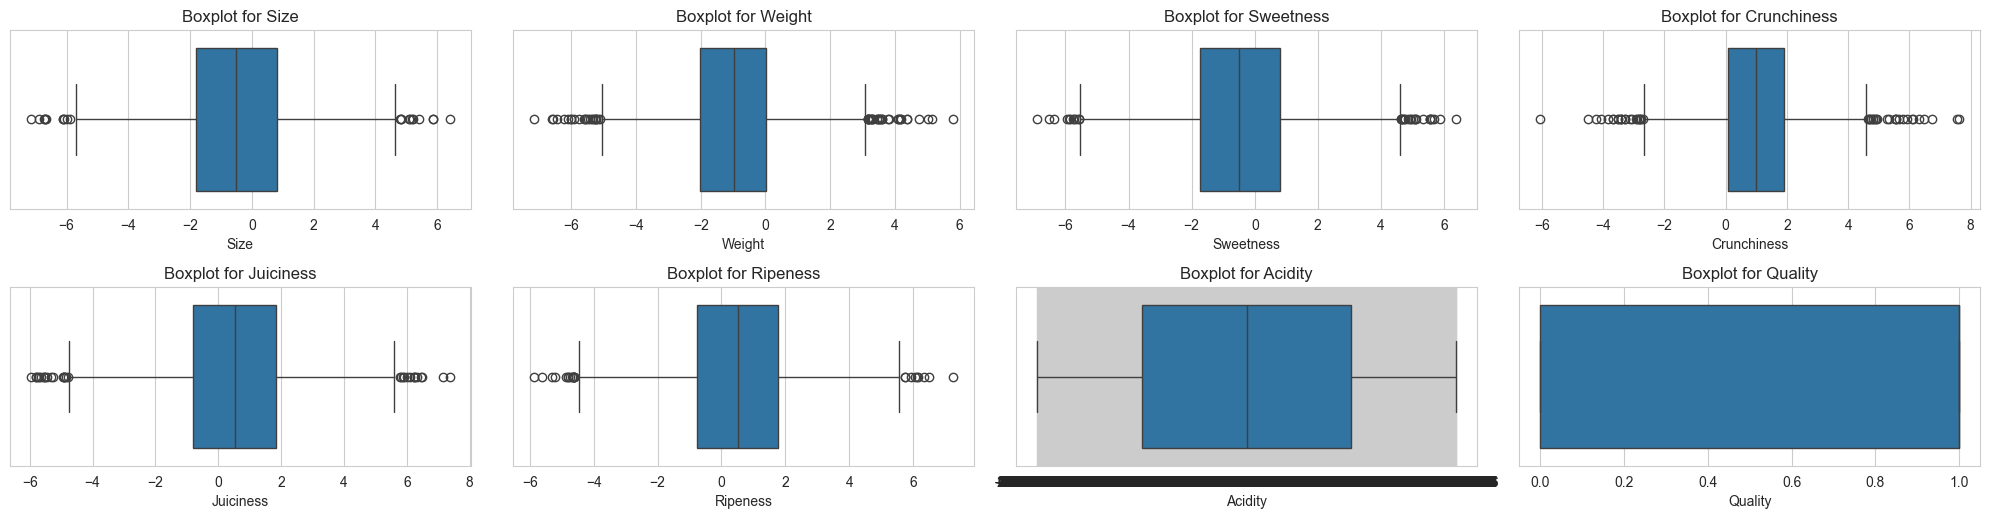

In [62]:

plt.figure(figsize=(20, 10))

for i, attribute in enumerate(data.columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=data[attribute])
    plt.title(f'Boxplot for {attribute}')

plt.tight_layout()
plt.show()



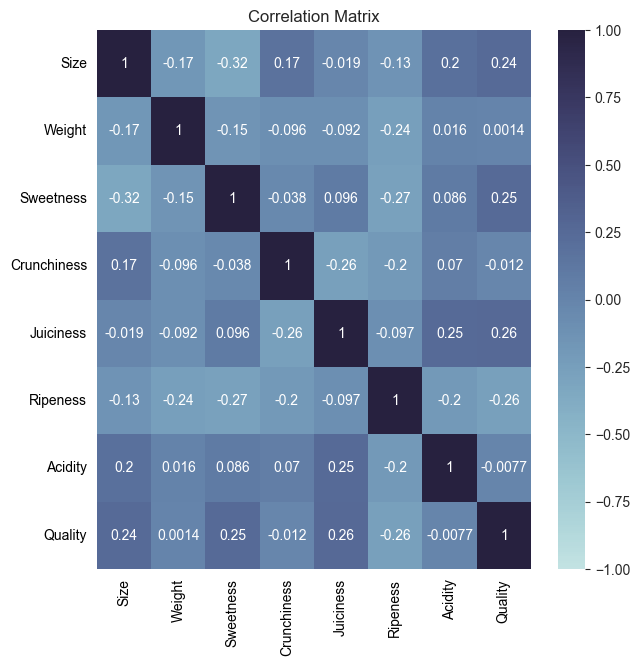

In [63]:

corr_matrix = data.corr()

plt.figure(figsize=(7,7))
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.show()




# preprocesiranje

In [64]:


X = data.drop('Quality', axis=1)

X_columns = X.columns
scaler = StandardScaler()

data[X_columns] = scaler.fit_transform(data[X_columns])



In [65]:
X = data.drop('Quality', axis=1)
y = data['Quality']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# treniranje modela

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Slobodni član: ', model.intercept_)
print('Koeficijenti hiperravni: ', model.coef_)

Slobodni član:  0.49736209021025507
Koeficijenti hiperravni:  [ 0.21254206  0.07408643  0.1854689   0.01372644  0.15348102 -0.03952068
 -0.10634199]


In [68]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Size,0.212542
Weight,0.074086
Sweetness,0.185469
Crunchiness,0.013726
Juiciness,0.153481
Ripeness,-0.039521
Acidity,-0.106342


In [69]:
y_pred = model.predict(X_test)

In [70]:
df_ped = pd.DataFrame({'Stvarno': y_test, 'Predviđeno': y_pred})
df_ped.head(15)

,Stvarno,Predviđeno
221,1,0.577210
459,0,0.404423
1373,1,0.542997
2737,0,0.534266
1848,0,0.111879
2348,0,0.508919
487,1,0.849417
2836,0,-0.180837
697,1,0.974122
716,1,0.841283


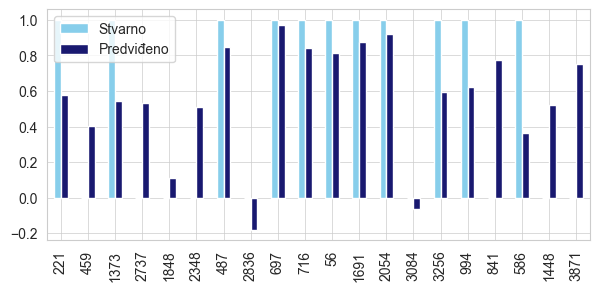

In [71]:

df1 = df_ped.head(20)
df1.plot(kind='bar', figsize=(7,3), color=['skyblue', 'midnightblue'])


plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.show()


Atribut: Acidity, Skor: -0.10634
Atribut: Ripeness, Skor: -0.03952
Atribut: Crunchiness, Skor: 0.01373
Atribut: Weight, Skor: 0.07409
Atribut: Juiciness, Skor: 0.15348
Atribut: Sweetness, Skor: 0.18547
Atribut: Size, Skor: 0.21254


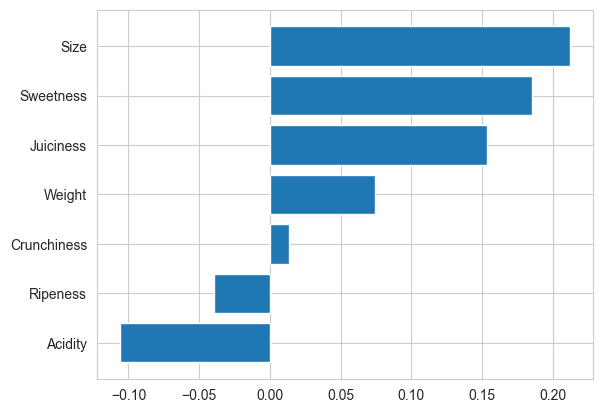

In [72]:
importance = sorted(zip(model.coef_, X.columns), key = lambda x: x[0])

for coef, feat in importance:
	print('Atribut: %s, Skor: %.5f' % (feat, coef))

plt.barh([x[1] for x in importance], [x[0] for x in importance])
plt.show()

In [73]:

from sklearn import metrics
print('Srednja apsolutna greška:', metrics.mean_absolute_error(y_test, y_pred))  
print('Srednja kvadratna greška:', metrics.mean_squared_error(y_test, y_pred))  
print('Koren iz srednje kvadratne greške:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Koeficijent determinisanosti:', model.score(X_test, y_test))

Srednja apsolutna greška: 0.36041297703131364
Srednja kvadratna greška: 0.1725202578531845
Koren iz srednje kvadratne greške: 0.4153555800193185
Koeficijent determinisanosti: 0.309914655553859
